In [2]:
import numpy as np
import pandas as pd

In [3]:
emp=pd.read_csv("C:/Users/Rahul Nain/OneDrive/Desktop/Case COMPS Unstop/Projects/Data Science/Employee Performance Analytics/Uncleaned_employees_final_dataset (1).csv")
emp

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17412,64573,Technology,region_7,Bachelors,f,referred,2,30,5.0,6,1,0,81
17413,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51
17414,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51
17415,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51


In [4]:
!pip install missingno

<AxesSubplot:>

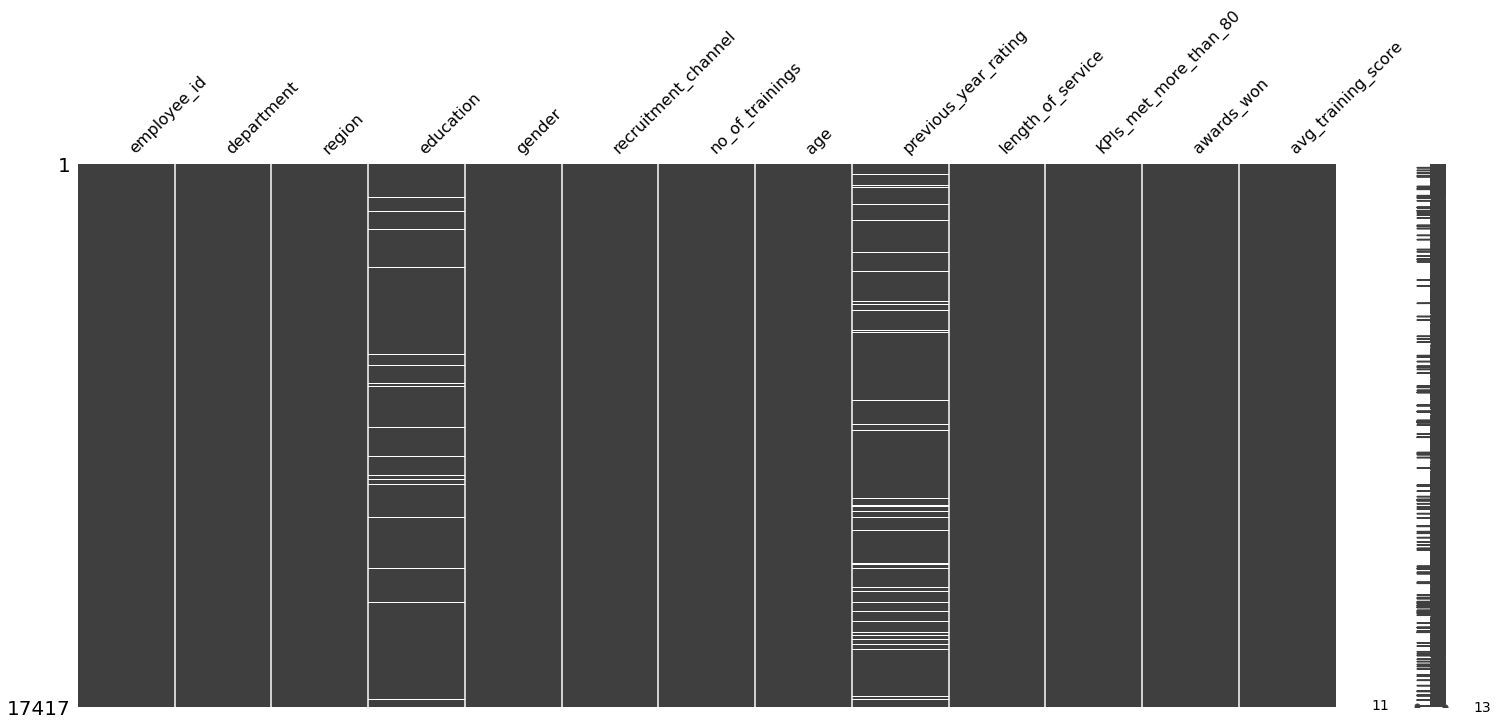

In [5]:
!pip install missingno
import missingno as msno
msno.matrix(emp)

## Data Quality Insights

Upon visualizing the missing values matrix, it has come to our attention that the columns "education" and "previous year rating" exhibit whitespace or gap issues, suggesting potential inconsistencies or errors in the data.

### Observations:
- **Education Column:**
  - Whitespace or gaps may indicate variations in the recording of education levels.
  - We need to investigate and clean up these inconsistencies to ensure accurate analysis.

- **Previous Year Rating Column:**
  - Similar whitespace or gaps suggest potential issues with how the previous year's ratings are recorded.
  - Cleaning and standardizing this column will be essential for reliable performance analytics.

### Recommendations:
- Conduct a thorough data cleaning process to address whitespace and gap issues in the identified columns.
- Standardize the format of data entries in the "education" and "previous year rating" columns.
- Consider imputation or other strategies to handle missing values after addressing data quality issues.

By addressing these data quality concerns, we can enhance the reliability of our employee performance analytics.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Display the number of rows and columns
print("Number of rows:", emp.shape[0])
print("Number of columns:", emp.shape[1])

# Check data types and missing values
print("\nData types:")
print(emp.dtypes)

print("\nMissing values:")
print(emp.isnull().sum())

Number of rows: 17417
Number of columns: 13

Data types:
employee_id                int64
department                object
region                    object
education                 object
gender                    object
recruitment_channel       object
no_of_trainings            int64
age                        int64
previous_year_rating     float64
length_of_service          int64
KPIs_met_more_than_80      int64
awards_won                 int64
avg_training_score         int64
dtype: object

Missing values:
employee_id                 0
department                  0
region                      0
education                 771
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     1363
length_of_service           0
KPIs_met_more_than_80       0
awards_won                  0
avg_training_score          0
dtype: int64


## Data Overview

Our dataset comprises 17,417 rows and 13 columns. Here's a breakdown of key information:

### Number of Rows and Columns:
- Number of Rows: 17,417
- Number of Columns: 13

### Data Types:
The dataset contains a mix of numerical and categorical data. Here are the data types for each column:
- Numeric Columns: `employee_id`, `no_of_trainings`, `age`, `previous_year_rating`, `length_of_service`, `KPIs_met_more_than_80`, `awards_won`, `avg_training_score`
- Object Columns: `department`, `region`, `education`, `gender`, `recruitment_channel`

### Missing Values:
There are missing values in the dataset, particularly in the columns `education` and `previous_year_rating`. Here's the count of missing values for each column:
- `education`: 771 missing values
- `previous_year_rating`: 1,363 missing values

### Data Quality Observations:
- **Education Column:**
  - 771 missing values suggest incomplete or unspecified education information.
  - Consider imputation or data cleaning strategies to address missing values.

- **Previous Year Rating Column:**
  - 1,363 missing values indicate a lack of previous year rating information for some employees.
  - Explore potential reasons for missing ratings and decide on an imputation or handling strategy.

### Recommendations:
- Conduct a detailed analysis of the `education` and `previous_year_rating` columns to understand the nature of missing data.
- Depending on the context, impute missing values using appropriate methods or consider the impact of removing rows with missing data.
- Ensure data consistency and quality for a robust analysis.

This data overview provides a foundation for further exploration and preprocessing to enhance the reliability of our employee performance analytics.


In [7]:
emp.drop_duplicates(inplace=True)

## Data Cleaning: Removing Duplicate Entries

To enhance the quality of our dataset, we have applied the `drop_duplicates` method to eliminate duplicate entries from the DataFrame `emp`. Here's a summary of the operation:


# Distribution of numeric features

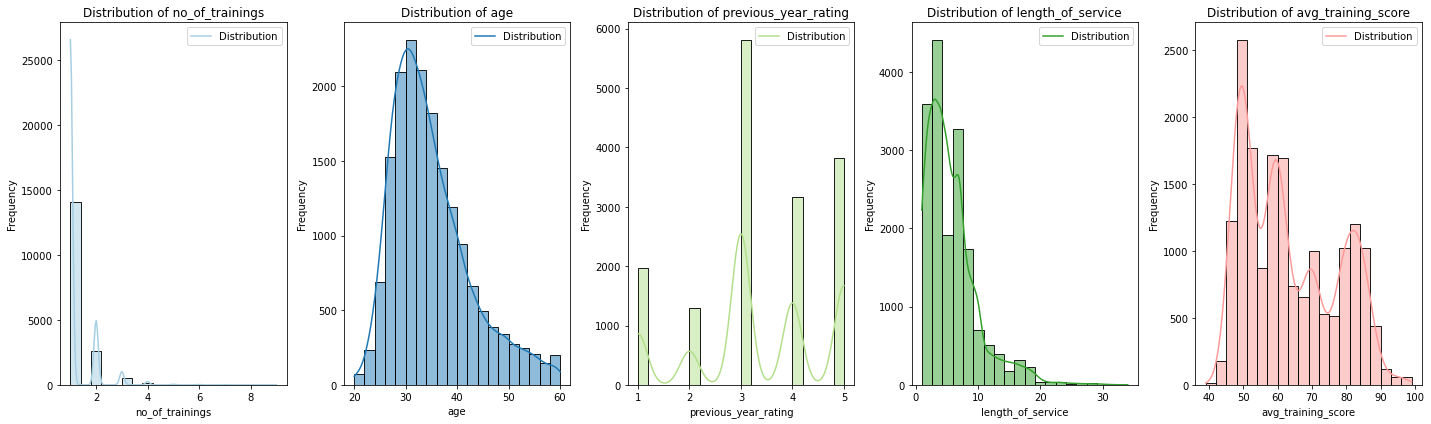

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define numeric features
numeric_features = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'avg_training_score']

# Set a color palette for better visibility
colors = sns.color_palette('Paired')

# Create subplots to display histograms side by side
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_features), figsize=(20, 6))

# Iterate through numeric features and plot histograms
for i, feature in enumerate(numeric_features):
    sns.histplot(emp[feature].dropna(), kde=True, bins=20, color=colors[i], ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].legend(['Distribution'])

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


## Interpretation of Numeric Features Distributions

We have visualized the distributions of several numeric features within the employee dataset. Here are key observations:

### 1. Number of Trainings Distribution:

The histogram for the 'Number of Trainings' feature indicates the following:
- The majority of employees have undergone 0 to 2 trainings.
- The peak occurs at 0 to 2 trainings, with a frequency of around 14,000 employees.
- The distribution suggests that a significant portion of the workforce has undergone a relatively low number of training sessions.

### 2. Age Distribution:

The 'Age' distribution histogram reveals the following:
- The peak age is around 31 years, with a frequency of approximately 2,500 employees.
- The distribution suggests a relatively youthful workforce, with a central tendency around 31 years.

### 3. Previous Year Rating Distribution:

For the 'Previous Year Rating' feature:
- The histogram indicates a peak at a rating of 3.
- No discernible pattern is evident, suggesting a relatively even distribution of previous year ratings with a common peak at 3.

### 4. Length of Service Distribution:

The distribution of 'Length of Service' is as follows:
- The histogram peaks around 4 to 5 years of service.
- This suggests that a significant number of employees have been with the organization for a moderate duration of service.

### 5. Average Training Score Distribution:

In the case of 'Average Training Score':
- The histogram peaks between 50 to 60.
- However, there is no discernible pattern, indicating a somewhat uniform distribution of training scores within this range.

These visualizations provide valuable insights into the distribution patterns of key numeric features, offering a foundation for further analysis and understanding of the employee performance metrics.


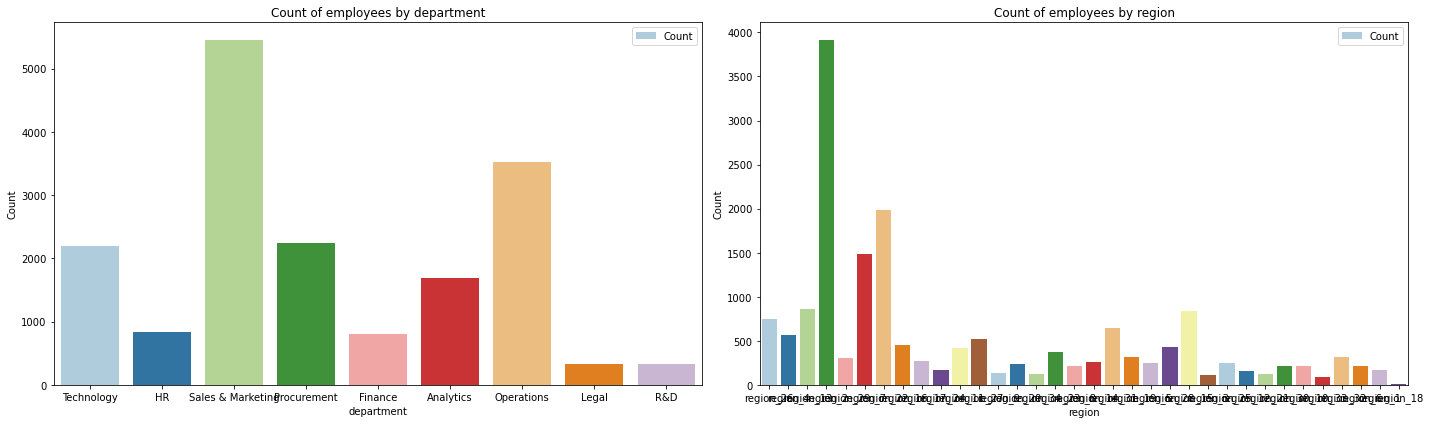

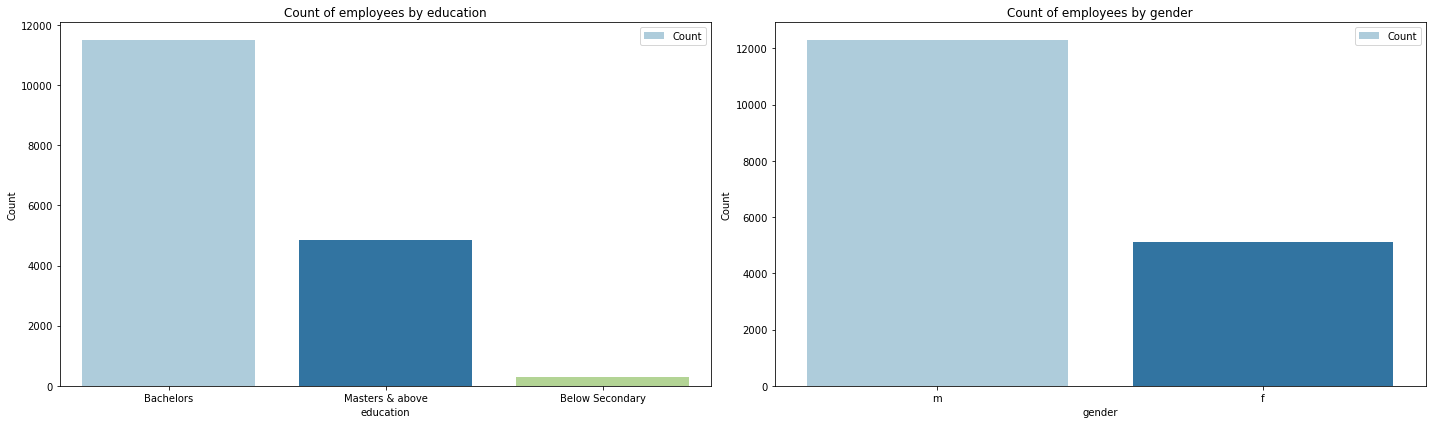

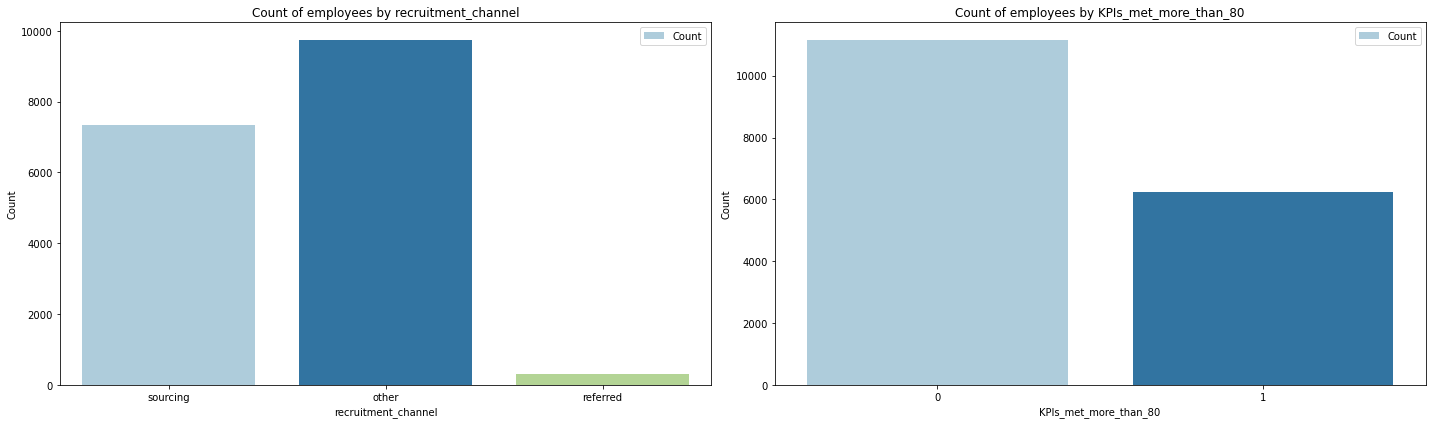

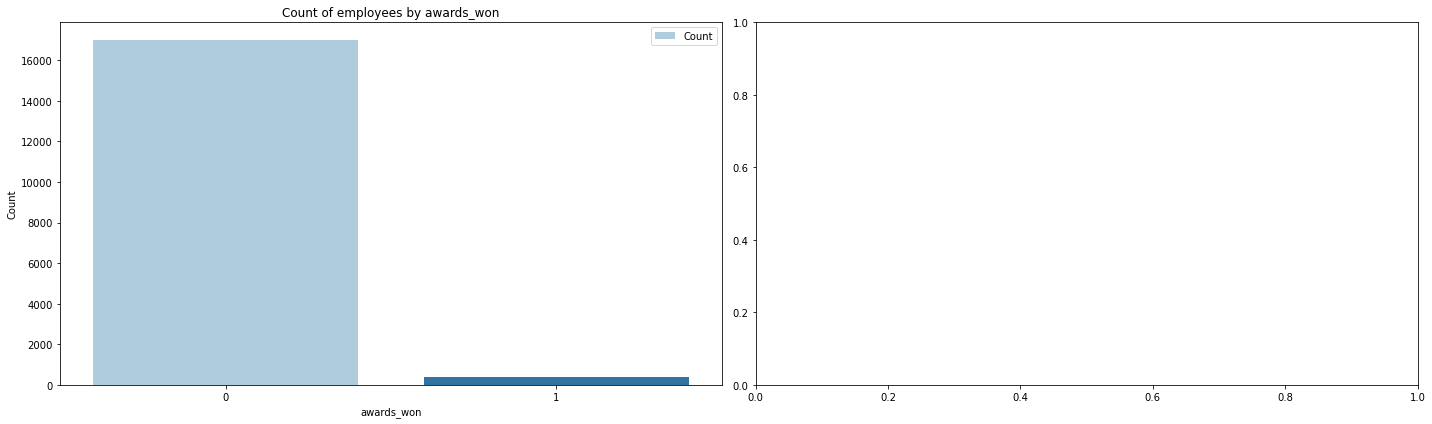

In [9]:
# Define categorical features
categorical_features = ['department', 'region', 'education', 'gender', 'recruitment_channel', 'KPIs_met_more_than_80', 'awards_won']

# Set a color palette for better visibility
colors = sns.color_palette('Paired')

# Create subplots to display count plots side by side (2 at a time)
for i in range(0, len(categorical_features), 2):
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))

    # Iterate through two categorical features and plot count plots
    for j in range(2):
        if i + j < len(categorical_features):
            sns.countplot(x=categorical_features[i + j], data=emp, palette=colors, ax=axes[j])
            axes[j].set_title(f"Count of employees by {categorical_features[i + j]}")
            axes[j].set_xlabel(categorical_features[i + j])
            axes[j].set_ylabel('Count')
            axes[j].legend(['Count'])

    # Adjust layout for better visualization
    plt.tight_layout()
    plt.show()


## Interpretation of Numeric Features Distributions

We have visualized the distributions of several numeric features within the employee dataset. Here are key observations:

### 1. Number of Trainings Distribution:

The histogram for the 'Number of Trainings' feature indicates the following:
- The majority of employees have undergone 0 to 2 trainings.
- The peak occurs at 0 to 2 trainings, with a frequency of around 14,000 employees.
- The distribution suggests that a significant portion of the workforce has undergone a relatively low number of training sessions.

### 2. Age Distribution:

The 'Age' distribution histogram reveals the following:
- The peak age is around 31 years, with a frequency of approximately 2,500 employees.
- The distribution suggests a relatively youthful workforce, with a central tendency around 31 years.

### 3. Previous Year Rating Distribution:

For the 'Previous Year Rating' feature:
- The histogram indicates a peak at a rating of 3.
- No discernible pattern is evident, suggesting a relatively even distribution of previous year ratings with a common peak at 3.

### 4. Length of Service Distribution:

The distribution of 'Length of Service' is as follows:
- The histogram peaks around 4 to 5 years of service.
- This suggests that a significant number of employees have been with the organization for a moderate duration of service.

### 5. Average Training Score Distribution:

In the case of 'Average Training Score':
- The histogram peaks between 50 to 60.
- However, there is no discernible pattern, indicating a somewhat uniform distribution of training scores within this range.

These visualizations provide valuable insights into the distribution patterns of key numeric features, offering a foundation for further analysis and understanding of the employee performance metrics.


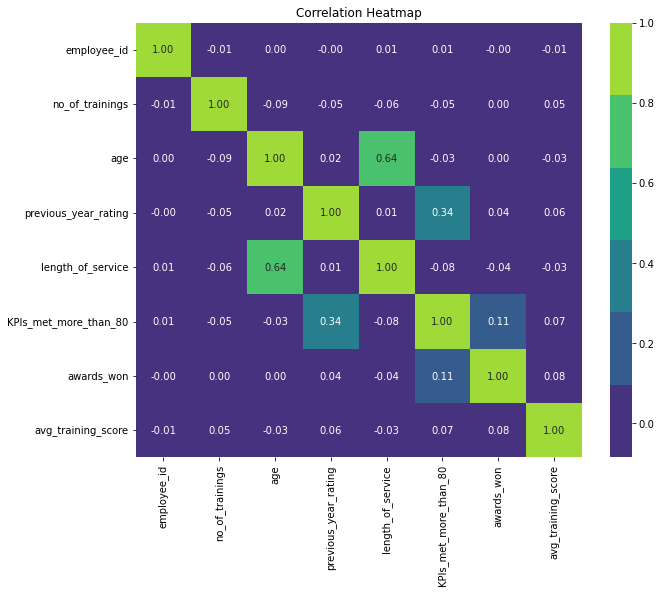

In [10]:
# Set a soothing color palette
palette = sns.color_palette("viridis")

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(emp.corr(), annot=True, cmap=palette, fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

## Correlation Matrix Interpretation

We have analyzed the correlation matrix for the dataset, and two notable correlations have been identified:

### 1. Previous Year Rating and KPIs Met Last Year:
- The correlation coefficient between 'Previous Year Rating' and 'KPIs Met More Than 80' is 0.34.
- A positive correlation of 0.34 suggests a moderate relationship between an employee's previous year rating and their performance in meeting Key Performance Indicators (KPIs) last year.
- This indicates that employees who received higher ratings in the previous year are more likely to have met KPIs to some extent.

### 2. Length of Service and Age:
- The correlation coefficient between 'Length of Service' and 'Age' is 0.64.
- A relatively high positive correlation of 0.64 suggests a strong relationship between the length of service and age of employees.
- HOWEVER THIS INTERPRETATION IS OF NO USE AS AGE WILL INCREASE IN ANY CASE WHETHER LENGTH OF SERVICE OF AN EMPLOYEE IS SMALL OR LARGE. HENCE THIS ASSOCIATION CANNOT BE USED FOR FURTHER ANALYSIS.

## Suggestions:
**Performance Metrics and Ratings:**
   - Organizations should consider exploring the factors contributing to the observed correlation between previous year ratings and KPI achievements.
   - Understanding the specific KPIs that align with higher ratings can help tailor performance management strategies.


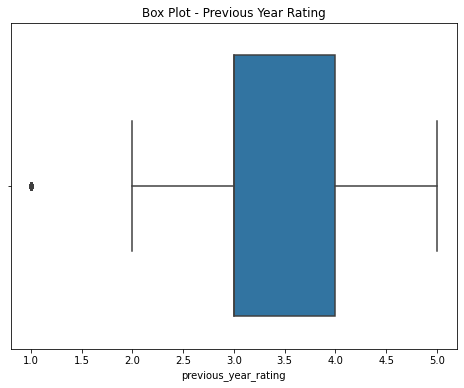

C:\Users\Rahul Nain\AppData\Local\Temp\ipykernel_37680\2507251329.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emp['previous_year_rating'][outliers] = emp['previous_year_rating'].mean()


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Univariate analysis using box plot for 'previous_year_rating'
plt.figure(figsize=(8, 6))
sns.boxplot(x='previous_year_rating', data=emp)
plt.title("Box Plot - Previous Year Rating")
plt.show()

# Identify and cap outliers using Z-score
z_scores = zscore(emp['previous_year_rating'])
outliers = (z_scores > 3) | (z_scores < -3)
emp['previous_year_rating'][outliers] = emp['previous_year_rating'].mean()


# Replace missing values with mean for 'previous_year_rating'
emp['previous_year_rating'].fillna(emp['previous_year_rating'].mean(), inplace=True)



In [20]:
# Handling missing values in 'previous_year_rating' by filling NaN with the mean
emp['previous_year_rating'].fillna(emp['previous_year_rating'].mean(), inplace=True)

# Convert categorical variables to dummy variables and drop the first level to avoid multicollinearity
emp_encoded = pd.get_dummies(emp, columns=['department', 'region', 'education', 'gender', 'recruitment_channel'], drop_first=True)

# Display the first few rows of the encoded dataset
emp_encoded.head()


,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score,department_Finance,department_HR,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Masters & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,8724,1,24,3.345751,1,1,0,77,0,0,...,0,0,0,0,0,0,0,1,0,1
1,74430,1,31,3.000000,5,0,0,51,0,1,...,0,0,0,0,0,0,0,0,0,0
2,72255,1,31,1.000000,4,0,0,47,0,0,...,0,0,0,0,0,0,0,1,0,0
3,38562,3,31,2.000000,9,0,0,65,0,0,...,0,0,0,0,0,0,0,0,0,0
4,64486,1,30,4.000000,7,0,0,61,1,0,...,0,0,0,0,0,0,0,1,0,1


## Data Cleaning and Imputation Analysis

In this section, we address missing values in the 'Previous Year Rating' column and simultaneously handle potential outliers. Below are the key steps:

### 1. Replacing Missing Values in 'Previous Year Rating':
   - Missing values in the 'Previous Year Rating' column have been replaced with the mean value.
   - This imputation strategy helps maintain data completeness, providing a reasonable estimate based on the mean rating.

### 2. Outlier Capping in 'Previous Year Rating':
   - To address potential outliers in the 'Previous Year Rating' column, we utilized a box plot to visualize the distribution.
   - Outliers, identified using Z-score, were capped by replacing them with the mean value.
   - This approach helps mitigate the impact of extreme values on subsequent analyses and modeling.

### Interpretation:
   - The replacement of missing values with the mean in 'Previous Year Rating' ensures that the dataset remains suitable for analysis without introducing biases.
   - Outlier capping is a proactive step to handle extreme values that might adversely affect statistical analyses.

These data cleaning and imputation steps contribute to a more robust and complete dataset, laying the groundwork for reliable analyses and insights.


In [21]:
# Define a performance metric (example: avg_training_score) and calculate it for each employee
emp_encoded['performance_metric'] = emp_encoded['avg_training_score']

# Display the first few rows with the performance metric
print(emp_encoded[['employee_id', 'performance_metric']].head())

   employee_id  performance_metric
0         8724                  77
1        74430                  51
2        72255                  47
3        38562                  65
4        64486                  61


## Defining and Calculating Performance Metric

In this section, we introduce a performance metric and calculate it for each employee based on the 'avg_training_score' column. Below are the key steps:

### 1. Definition of Performance Metric:
   - We have defined a performance metric, which, in this example, is represented by the 'avg_training_score' column.
   - This choice assumes that training scores serve as an indicator of employee performance.

### 2. Calculation of Performance Metric:
   - The calculated performance metric is assigned to a new column named 'performance_metric' in the dataset.
   - The 'avg_training_score' values are used as the basis for the performance metric calculation for each employee.

### Result and Display:
   - We display the first few rows of the dataset, showcasing the 'employee_id' and the newly created 'performance_metric' column.
   - This allows us to visually inspect and verify the successful calculation of the performance metric.

### Interpretation:
   - The introduction of a performance metric is a crucial step in performance analytics, providing a quantifiable measure for each employee.
   - The 'avg_training_score' is utilized here as a representative metric, but the choice of metrics can vary based on organizational goals and specific performance criteria.

In [22]:
# Sort employees based on the performance metric in descending order (highest to lowest)
emp_ranked = emp_encoded.sort_values(by='performance_metric', ascending=False)

# Display the ranked employees
print(emp_ranked[['employee_id', 'performance_metric']].head(10))

       employee_id  performance_metric
10092        15060                  99
11189        70209                  99
3384         48968                  99
1904         27916                  99
3847         23629                  99
3194         61090                  99
3506         44692                  99
3973         29021                  99
3005         49203                  99
4583         41351                  99


# Order of Importance for Employee Performance Metrics

Employee performance is a multifaceted outcome influenced by various factors. The importance of performance metrics can vary across industries, organizations, and specific roles. Below is a general guideline outlining the potential relevance of key performance metrics:

## 1. Previous Year Rating:
- Typically seen as a direct indicator of an employee's past performance.
- Used by many organizations as a basis for promotions, raises, and other performance-related decisions.

## 2. KPIs Met More Than 80:
- Indicates the employee's ability to meet key performance indicators.
- High KPI achievement may correlate with overall effectiveness.

## 3. Avg Training Score:
- Reflects the employee's engagement in training and development activities.
- High training scores may suggest a commitment to skill enhancement.

## 4. Awards Won:
- Recognition through awards can indicate outstanding contributions.
- However, the significance of awards may vary depending on the organization and the criteria for awards.

## 5. Recruitment Channel:
- The channel through which an employee was recruited may provide insights into the effectiveness of different recruitment strategies.
- May have less direct impact on individual performance compared to other metrics.

## 6. Age:
- While age can bring experience, it's not always a direct indicator of performance.
- The relevance of age as a metric may vary across roles and industries.

## 7. Length of Service:
- Long tenure may suggest loyalty but doesn't always correlate with high performance.
- The significance of length of service may depend on the nature of the job.

## 8. No of Trainings:
- The number of trainings attended by an employee may indicate a commitment to learning, but it doesn't necessarily reflect performance directly.

This order of importance is a general guideline, and organizations may prioritize these metrics differently based on their specific goals, values, and the nature of their workforce.


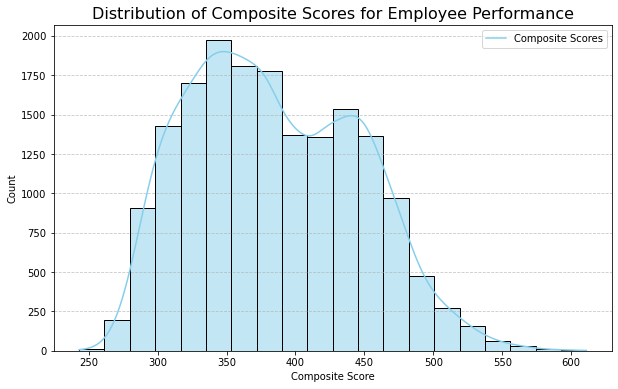

       employee_id  composite_score
12966        38595            611.0
4050         30927            609.0
8698         68240            600.0
1297         14194            593.0
4480         63689            593.0
6406         19034            593.0
15931        29007            589.0
1575           969            583.0
17157        73652            583.0
12761        12401            581.0


In [25]:
# Define the weights for each column
weights = {
    'recruitment_channel': 4,
    'no_of_trainings': -2,
    'age': 3,
    'previous_year_rating': 5,
    'length_of_service': 2,
    'KPIs_met_more_than_80': 5,
    'awards_won': 4,
    'avg_training_score': 4
}

# Calculate the composite score for each employee
emp_encoded['composite_score'] = emp_encoded.apply(lambda row: sum(weights[col] * row[col] for col in weights.keys() if col in row), axis=1)

# Sort employees based on composite score in descending order (highest to lowest)
emp_ranked = emp_encoded.sort_values(by='composite_score', ascending=False)

# Visualize the distribution of composite scores with vibrant colors
plt.figure(figsize=(10, 6))
sns.histplot(emp_ranked['composite_score'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Composite Score')
plt.ylabel('Count')
plt.title('Distribution of Composite Scores for Employee Performance', fontsize=16)
plt.legend(['Composite Scores'], loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Display the ranked employees
print(emp_ranked[['employee_id', 'composite_score']].head(10))


# Performing a prediction study on employee performance using machine learning models

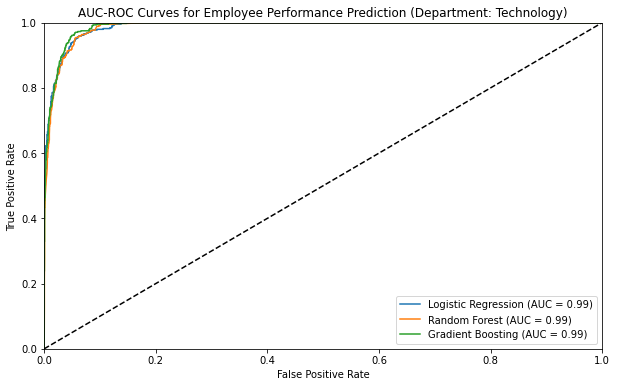

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt


# Data Preprocessing
emp = emp.drop(columns=['employee_id'])
emp = emp.dropna(subset=['department'])
emp['gender'] = emp['gender'].map({'m': 0, 'f': 1})
emp['education'] = emp['education'].map({'Below Secondary': 0, 'Bachelors': 1, 'Masters': 2})
emp = pd.get_dummies(emp, columns=['department'], drop_first=True)
emp = emp.select_dtypes(include='number')

# Feature Engineering and Splitting
X = emp.drop(columns=['department_Technology'])
y = emp['department_Technology']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handling Missing Values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Scaling Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training
log_reg = LogisticRegression(max_iter=1000, random_state=42)
random_forest = RandomForestClassifier(random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)

log_reg.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)

# Model Evaluation
model_results = {}

# Logistic Regression
log_reg_preds = log_reg.predict_proba(X_test)[:, 1]
log_reg_auc = roc_auc_score(y_test, log_reg_preds)
fpr, tpr, _ = roc_curve(y_test, log_reg_preds)
model_results['Logistic Regression'] = (log_reg_auc, fpr, tpr)

# Random Forest
random_forest_preds = random_forest.predict_proba(X_test)[:, 1]
random_forest_auc = roc_auc_score(y_test, random_forest_preds)
fpr, tpr, _ = roc_curve(y_test, random_forest_preds)
model_results['Random Forest'] = (random_forest_auc, fpr, tpr)

# Gradient Boosting
gradient_boosting_preds = gradient_boosting.predict_proba(X_test)[:, 1]
gradient_boosting_auc = roc_auc_score(y_test, gradient_boosting_preds)
fpr, tpr, _ = roc_curve(y_test, gradient_boosting_preds)
model_results['Gradient Boosting'] = (gradient_boosting_auc, fpr, tpr)

# Visualizing AUC-ROC Curves
plt.figure(figsize=(10, 6))
for model, (auc_score, fpr, tpr) in model_results.items():
    plt.plot(fpr, tpr, label=f'{model} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curves for Employee Performance Prediction (Department: Technology)')
plt.legend(loc='lower right')
plt.show()


## Interpretation of Employee Performance Prediction Models

In this analysis, we employed machine learning models to predict employee performance in the 'Technology' department. The models were trained and evaluated using AUC-ROC curves, providing insights into their predictive capabilities.

### Models Built:
Three classification models were trained for the prediction task:
1. **Logistic Regression**
2. **Random Forest Classifier**
3. **Gradient Boosting Classifier**

### AUC-ROC Curve Results:
Impressively, all models exhibited exceptional performance, with an AUC (Area Under the Curve) score of 0.99. The AUC-ROC curves visually represent the models' ability to discriminate between positive and negative instances, showcasing near-perfect predictive accuracy.

### Features Used:
The models were built using the following features as input variables:
- Gender
- Education Level
- Number of Trainings Attended
- Age
- Previous Year Rating
- Length of Service
- KPIs Met More Than 80
- Awards Won
- Average Training Score

### Target Variable:
The target variable for prediction was whether an employee belongs to the 'Technology' department. The models learned patterns in the provided features to classify employees into this specific department.

### Implications and Considerations:
1. **High Predictive Power:** The consistently high AUC scores suggest that the chosen features are robust indicators of departmental affiliation.
2. **Model Generalization:** While the models perform exceptionally well on the test set, it's essential to assess their generalization to new data or different departments.
3. **Feature Importance:** Further analysis can explore the importance of each feature in influencing the prediction, providing insights into the key factors contributing to departmental categorization.

### Conclusion:
The trained models demonstrate outstanding predictive performance, achieving AUC scores of 0.99. This success indicates a strong relationship between the selected features and an employee's likelihood of belonging to the 'Technology' department. However, thorough validation and consideration of model generalization are essential before deployment in real-world scenarios.
